In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
cocacola=pd.read_excel("C:/Users/hp/Downloads/CocaCola_Sales_Rawdata.xlsx")
quarters=['Q1','Q2','Q3','Q4']
quarters=pd.DataFrame(quarters)
Quarters=pd.DataFrame(np.tile(quarters,(11,1)))
Cocacola=pd.concat([cocacola,Quarters],axis=1)
Cocacola=Cocacola.dropna()
Cocacola.columns=['Quarter','Sales','quarters']


In [3]:
Cocacola

,Quarter,Sales,quarters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [4]:
Quarter_dummies=pd.get_dummies(Cocacola['quarters'])
Cocacola=pd.concat([Cocacola,Quarter_dummies],axis=1)

In [5]:
Cocacola

,Quarter,Sales,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [6]:
Cocacola['t']=np.arange(1,43)
Cocacola['t_sq']=Cocacola['t']*Cocacola['t']
Cocacola['log_sales']=np.log(Cocacola['Sales'])

In [7]:
Train=Cocacola[0:30]
Test=Cocacola[30:]


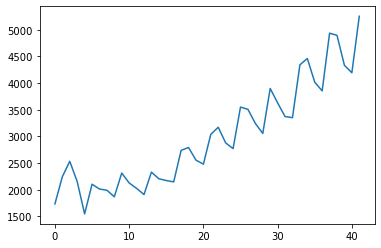

In [8]:
plt.plot(Cocacola.iloc[:,1])
Test.set_index(np.arange(1,13),inplace=True)

In [9]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281297

In [10]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

552.2821039079295

In [11]:
#Quadratic 

Quad = smf.ols('Sales~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

646.2715428311323

In [12]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941363

In [13]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~Q1+Q2+Q3+Q4+t+t_sq',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

586.0533067870459

In [14]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238912138073

In [15]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

410.24970596078435

In [16]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,410.249706
1,rmse_Exp,552.282104
4,rmse_add_sea_quad,586.053307
2,rmse_Quad,646.271543
0,rmse_linear,714.014448
3,rmse_add_sea,1778.006547
5,rmse_Mult_sea,1828.923891


In [17]:
df1= Cocacola.set_index('Quarter')
df1

,Sales,quarters,Q1,Q2,Q3,Q4,t,t_sq,log_sales
Quarter,,,,,,,,,
Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186


In [18]:
df2 = df1.iloc[:,0:1]
df2

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [19]:
# separate out a validation dataset
split_point = len(df2) - 10
dataset, validation = df2[0:split_point], df2[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [20]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
train = pd.read_excel("C:/Users/hp/Downloads/CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [21]:
train

array([1734.827, 2244.961, 2533.805, 2154.963, 1547.819, 2104.412,
       2014.363, 1991.747, 1869.05 , 2313.632, 2128.32 , 2026.829,
       1910.604, 2331.165, 2206.55 , 2173.968, 2148.278, 2739.308,
       2792.754, 2556.01 , 2480.974], dtype=float32)

In [22]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
>Predicted=4342.000, Expected=4461.000
>Predicted=4461.000, Expected=4017.000
>Predicted=4017.000, Expected=3854.000
>Predicted=3854.000, Expected=4936.000
>Predicted=4936.000, Expected=4895.000
>Predicted=4895.000, Expected=4333.000
>Predicted=4333.000, Expected=4194.000
>Predicted=4194.000, Expected=5253.000
RMSE: 527.148


In [23]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [24]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [25]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=840.936
ARIMA(0, 0, 1) RMSE=617.895
ARIMA(0, 0, 2) RMSE=450.667
ARIMA(0, 1, 0) RMSE=389.741
ARIMA(0, 1, 1) RMSE=396.142
ARIMA(0, 1, 2) RMSE=354.964
ARIMA(0, 1, 3) RMSE=317.291
ARIMA(0, 1, 4) RMSE=272.865
ARIMA(0, 2, 0) RMSE=593.232
ARIMA(0, 2, 1) RMSE=414.859
ARIMA(0, 2, 2) RMSE=346.962
ARIMA(0, 2, 3) RMSE=351.801
ARIMA(1, 0, 0) RMSE=470.350
ARIMA(1, 1, 0) RMSE=387.223
ARIMA(1, 2, 0) RMSE=574.839
ARIMA(2, 0, 0) RMSE=493.074
ARIMA(2, 1, 0) RMSE=300.157
ARIMA(2, 2, 0) RMSE=485.191
ARIMA(3, 0, 0) RMSE=428.582
ARIMA(3, 1, 0) RMSE=245.267
ARIMA(3, 2, 0) RMSE=156.907
ARIMA(4, 1, 0) RMSE=163.619
ARIMA(4, 2, 0) RMSE=161.799
Best ARIMA(3, 2, 0) RMSE=156.907


In [26]:
train = pd.read_excel("C:/Users/hp/Downloads/CocaCola_Sales_Rawdata.xlsx", header=0, index_col=0, parse_dates=True)
X = train.values
X = X.astype('float32')

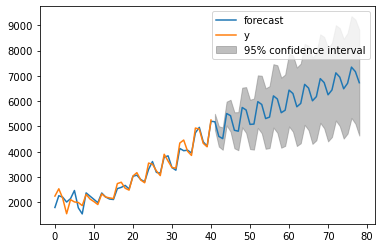

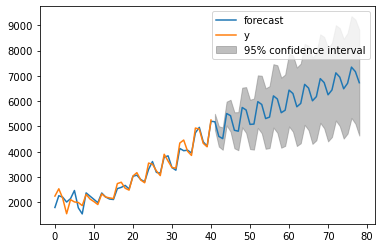

In [27]:
# fit model
model = ARIMA(X, order=(4,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [28]:
forecast

array([5183.65131286, 4605.84977816, 4517.98221612, 5510.79141831,
       5425.02159129, 4847.14733479, 4811.66231781, 5748.47342001,
       5649.67429693, 5079.55802362])

In [29]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

1108.8194892795118